In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

lends = pd.read_csv('lenders.csv', usecols = ['COUNTRY_CODE','STATE'])
lends

,STATE,COUNTRY_CODE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1551185,NaN,NaN
1551186,NaN,NaN
1551187,NaN,NaN
1551188,NaN,NaN


In [112]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK', 
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Armed Forces Europe': 'AE',
    'Armed Forces Pacific': 'AP',
    ''
}

cap = {a.upper():b for a, b in us_state_abbrev.items()}
abbrev = np.array(list(us_state_abbrev.values()))
state = np.char.replace(np.char.upper(np.array(list(us_state_abbrev.keys()))), ' ', '')
lends['STATE'] = lends['STATE'].str.upper().str.replace(' ','')
us = lends[lends['COUNTRY_CODE'] == 'US']
state

array(['ALABAMA', 'ALASKA', 'AMERICANSAMOA', 'ARIZONA', 'ARKANSAS',
       'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE',
       'DISTRICTOFCOLUMBIA', 'FLORIDA', 'GEORGIA', 'GUAM', 'HAWAII',
       'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY',
       'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA',
       'NEVADA', 'NEWHAMPSHIRE', 'NEWJERSEY', 'NEWMEXICO', 'NEWYORK',
       'NORTHCAROLINA', 'NORTHDAKOTA', 'NORTHERNMARIANAISLANDS', 'OHIO',
       'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTORICO', 'RHODEISLAND',
       'SOUTHCAROLINA', 'SOUTHDAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH',
       'VERMONT', 'VIRGINISLANDS', 'VIRGINIA', 'WASHINGTON',
       'WESTVIRGINIA', 'WISCONSIN', 'WYOMING', 'ARMEDFORCESEUROPE',
       'ARMEDFORCESPACIFIC'], dtype='<U22')

In [113]:
from Levenshtein import distance

vd = np.vectorize(distance)
gc = us.groupby('STATE').count()
gc['lev_abbrev'] = [vd(s,abbrev) for s in gc.index]
gc['lev_state'] = [vd(s,state) for s in gc.index]
gc

,COUNTRY_CODE,lev_abbrev,lev_state
STATE,,,
,9,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 6, 13, 7, 8, 10, 8, 11, 8, 18, 7, 7, 4, 6,..."
$0.00,1,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[7, 6, 13, 7, 8, 10, 8, 11, 8, 18, 7, 7, 5, 6,..."
&,1,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 6, 13, 7, 8, 10, 8, 11, 8, 18, 7, 7, 4, 6,..."
"&ILLINOIS,",1,"[9, 10, 9, 10, 10, 10, 9, 10, 10, 10, 9, 10, 1...","[9, 9, 11, 8, 8, 8, 9, 10, 9, 15, 8, 9, 10, 8,..."
)R,1,"[2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 6, 12, 6, 7, 9, 7, 11, 7, 17, 6, 6, 4, 6, ..."
...,...,...,...
WWW.KIVAFRIENDS.ORG,2,"[18, 18, 17, 18, 17, 18, 18, 19, 18, 18, 18, 1...","[18, 17, 15, 15, 15, 16, 16, 18, 16, 18, 16, 1..."
WY,439,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 6, 13, 7, 8, 10, 8, 11, 7, 18, 7, 7, 4, 5,..."
WYO,1,"[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, ...","[7, 6, 12, 6, 8, 9, 7, 11, 7, 17, 6, 6, 4, 5, ..."


In [114]:
gc['min_state'] = gc['lev_state'].apply(lambda r: np.argmin(r))
gc['min_state_error'] = gc['lev_state'].apply(min)
gc['state'] = gc['min_state'].apply(lambda r: state[r])
gc['min_abbrev'] = gc['lev_abbrev'].apply(lambda r: np.argmin(r))
gc['min_abbrev_error'] = gc['lev_abbrev'].apply(min)
gc['abbrev'] = gc['min_abbrev'].apply(lambda r: abbrev[r])
gc

,COUNTRY_CODE,lev_abbrev,lev_state,min_state,min_state_error,state,min_abbrev,min_abbrev_error,abbrev
STATE,,,,,,,,,
,9,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 6, 13, 7, 8, 10, 8, 11, 8, 18, 7, 7, 4, 6,...",12,4,GUAM,0,2,AL
$0.00,1,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[7, 6, 13, 7, 8, 10, 8, 11, 8, 18, 7, 7, 5, 6,...",12,5,GUAM,0,5,AL
&,1,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 6, 13, 7, 8, 10, 8, 11, 8, 18, 7, 7, 4, 6,...",12,4,GUAM,0,2,AL
"&ILLINOIS,",1,"[9, 10, 9, 10, 10, 10, 9, 10, 10, 10, 9, 10, 1...","[9, 9, 11, 8, 8, 8, 9, 10, 9, 15, 8, 9, 10, 8,...",15,2,ILLINOIS,15,8,IL
)R,1,"[2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 6, 12, 6, 7, 9, 7, 11, 7, 17, 6, 6, 4, 6, ...",12,4,GUAM,4,1,AR
...,...,...,...,...,...,...,...,...,...
WWW.KIVAFRIENDS.ORG,2,"[18, 18, 17, 18, 17, 18, 18, 19, 18, 18, 18, 1...","[18, 17, 15, 15, 15, 16, 16, 18, 16, 18, 16, 1...",52,14,WASHINGTON,2,17,AS
WY,439,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 6, 13, 7, 8, 10, 8, 11, 7, 18, 7, 7, 4, 5,...",17,3,IOWA,55,0,WY
WYO,1,"[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, ...","[7, 6, 12, 6, 8, 9, 7, 11, 7, 17, 6, 6, 4, 5, ...",38,3,OHIO,55,1,WY


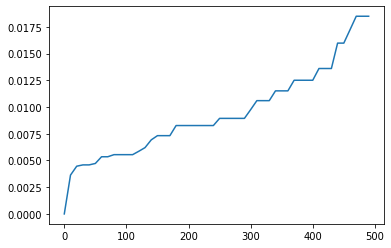

In [115]:
low_counts, loss = np.arange(0,500,10), []
t = gc['COUNTRY_CODE'].sum()
for c in low_counts:
    loss.append(gc[gc['COUNTRY_CODE'] <= c]['COUNTRY_CODE'].sum() / t)
sns.lineplot(low_counts, loss) #cut off anything below 100

In [116]:
gc_left = gc.drop(index = gc[gc['COUNTRY_CODE'] <= 50].index)
gc_left

,COUNTRY_CODE,lev_abbrev,lev_state,min_state,min_state_error,state,min_abbrev,min_abbrev_error,abbrev
STATE,,,,,,,,,
AE,135,"[1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, ...","[6, 5, 11, 6, 7, 9, 7, 10, 6, 18, 7, 6, 3, 5, ...",12,3,GUAM,56,0,AE
AK,1120,"[1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[6, 4, 12, 6, 6, 9, 7, 11, 7, 18, 7, 7, 3, 5, ...",12,3,GUAM,1,0,AK
AL,1324,"[0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, ...","[5, 4, 12, 6, 7, 8, 7, 11, 7, 17, 6, 7, 3, 5, ...",12,3,GUAM,0,0,AL
ALABAMA,549,"[5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 6, 6, 7, 7, 7, ...","[0, 3, 8, 5, 6, 7, 6, 11, 5, 16, 5, 6, 5, 5, 6...",0,0,ALABAMA,0,5,AL
ALASKA,463,"[4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, ...","[3, 0, 9, 5, 5, 7, 7, 11, 6, 16, 5, 6, 5, 5, 5...",1,0,ALASKA,0,4,AL
...,...,...,...,...,...,...,...,...,...
WI,4865,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, ...","[7, 6, 12, 6, 8, 9, 8, 10, 7, 17, 6, 6, 4, 4, ...",17,3,IOWA,54,0,WI
WISCONSIN,1660,"[9, 9, 8, 9, 9, 8, 7, 8, 9, 8, 9, 9, 9, 8, 8, ...","[9, 8, 10, 7, 7, 8, 8, 10, 9, 13, 8, 7, 9, 8, ...",54,0,WISCONSIN,6,7,CO
WV,517,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 6, 13, 7, 8, 10, 8, 11, 7, 18, 7, 7, 4, 5,...",17,3,IOWA,53,0,WV


In [117]:
gc_left.index.values

array(['AE', 'AK', 'AL', 'ALABAMA', 'ALASKA', 'AP', 'AR', 'ARIZONA',
       'ARKANSAS', 'AZ', 'CA', 'CA-CALIFORNIA', 'CALIFORNIA', 'CO',
       'COLORADO', 'CONNECTICUT', 'CT', 'D.C.', 'DC', 'DE', 'DELAWARE',
       'DISTRICTOFCOLUMBIA', 'FL', 'FLORIDA', 'GA', 'GEORGIA', 'HAWAII',
       'HI', 'IA', 'ID', 'IDAHO', 'IL', 'ILLINOIS', 'IN', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'KS', 'KY', 'LA', 'LOUISIANA', 'MA',
       'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MD', 'ME', 'MI', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MN', 'MO', 'MONTANA',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NEBRASKA', 'NEVADA', 'NEWHAMPSHIRE',
       'NEWJERSEY', 'NEWMEXICO', 'NEWYORK', 'NH', 'NJ', 'NM',
       'NORTHCAROLINA', 'NORTHDAKOTA', 'NV', 'NY', 'OH', 'OHIO', 'OK',
       'OKLAHOMA', 'OR', 'OREGON', 'PA', 'PENNSYLVANIA', 'PR',
       'RHODEISLAND', 'RI', 'SC', 'SD', 'SEOUL', 'SOUTHCAROLINA',
       'SOUTHDAKOTA', 'TENNESSEE', 'TEXAS', 'TN', 'TX', 'UT', 'UTAH',
       'VA', 'VERMONT',